## Часть 1.

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

    1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
    Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

__Ответ:__

Прокурор назвал вероятность 1%, что это вероятность подсудимого иметь такую группу крови, если бы он был невиновен. Но 1% - это априорная вероятность того, что подсудимый имеет такую группу крови, а не апостериорная.
   

    2.Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

__Ответ:__


   

## Часть 2.

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:

    1.Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [141]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal


import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [85]:
all_d = pd.read_csv('owid-covid-data.csv')

In [93]:
df = all_d[(all_d['location'] == 'Russia') & (all_d['date'] >= '2020-03-03')]
df['new_cases'] = np.where(df['new_cases'] == 0, 1, df['new_cases'])

In [94]:
df = df.reset_index(drop = True).reset_index().rename(columns={'index':'day_num'})

In [96]:
df.head()

,day_num,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
1,1,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2,2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
3,3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
4,4,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [98]:
test.shape

(311, 60)

    2.Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

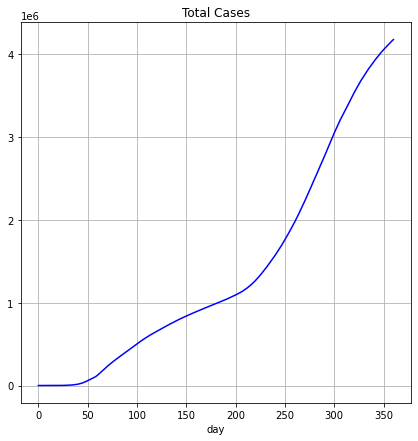

In [61]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(df.index, df['total_cases'].values, color = 'blue')

ax.set(xlabel='day', title='Total Cases')
ax.grid()
plt.show()

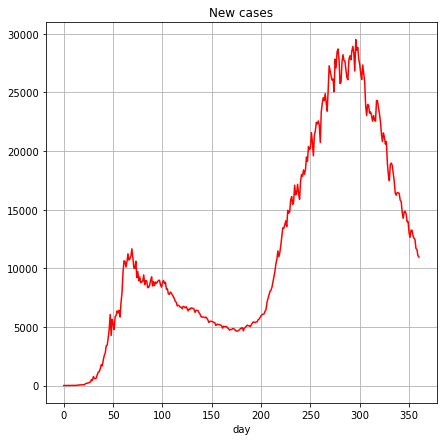

In [62]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(df.index, df['new_cases'].values, color = 'red')

ax.set(xlabel='day', title='New cases')
ax.grid()
plt.show()

    a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [128]:
df['total_cases_log'] = np.log(df['total_cases'])

train = df[:50]
test = df[50:]

In [129]:
X = train['day_num'].values.reshape(-1, 1)
y = train['total_cases_log']

In [130]:
reg = LinearRegression().fit(X, y)

In [131]:
df['pred_cases'] = reg.predict(df['day_num'].values.reshape(-1,1))

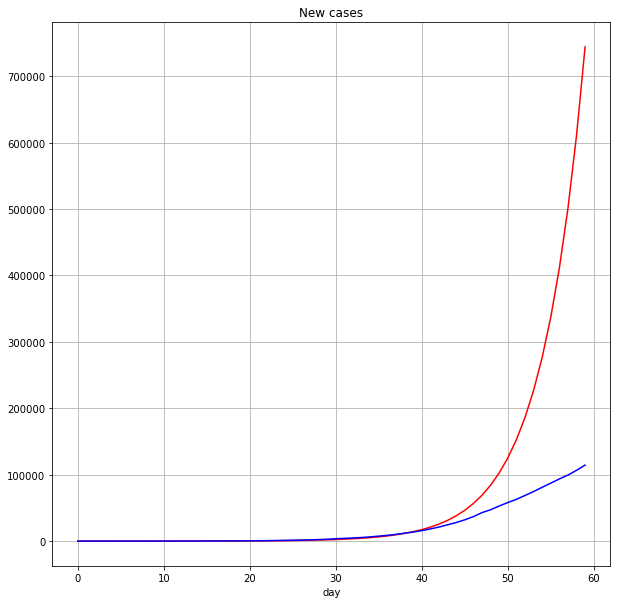

In [143]:
fig, ax = plt.subplots(figsize=(10,10))

a = 60
ax.plot(df[df['day_num']< a].index, np.exp(df[df['day_num']< a]['pred_cases'].values), color = 'red')
ax.plot(df[df['day_num']< a].index, df[df['day_num'] < a]['total_cases'].values, color = 'blue')


ax.set(xlabel='day', title='New cases')
ax.grid()
plt.show()

    b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса)

In [144]:
alpha, beta = reg.coef_[0], reg.intercept_

In [150]:
reg.coef_

array([0.19829091])

In [147]:
N = 250
xs = np.linspace(0, 60, N)
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    # Make the plot
    plt.figure(figsize=(8, 8))
    plt.axis('equal')
    plt.xlim((-1, 1))
    plt.ylim((-1, 2))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.show()

(250, 250)


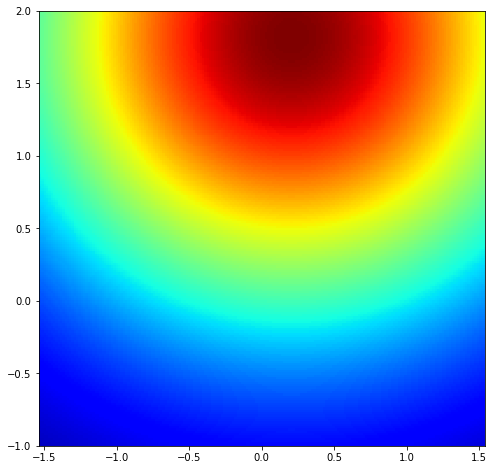

In [148]:
cur_mu, cur_sigma = np.array([alpha, beta]), 2*np.array([[1, 0], [0, 1]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

myplot_heatmap(Z)

    c.Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [157]:
start = pd.to_datetime('2020-03-03')
may = pd.to_datetime('2020-05-01')
june = pd.to_datetime('2020-06-01')
sept = pd.to_datetime('2020-09-01')

x_may = np.array([[(may - start).days]])
x_june = np.array([[(june - start).days]])
x_sept = np.array([[(sept - start).days]])

In [158]:
y_may_total = int(np.exp(reg.predict(x_may)))
y_june_total = int(np.exp(reg.predict(x_june)))
y_sept_total = int(np.exp(reg.predict(x_sept)))

In [159]:
print(f'К 1 мая {y_may_total} случаев')
print(f'К 1 июня {y_june_total} случаев')
print(f'К 1 сентября {y_sept_total} случаев')

К 1 мая 744077 случаев
К 1 июня 347723874 случаев
К 1 сентября 29104907396229896 случаев


In [152]:
plt.figure(figsize=figsize)
x_sample = np.hstack((x_train, x_test))
y_samples = np.exp(model_exp.predict_samples(x_sample.reshape(-1, 1)))

for y_sample in y_samples:
    plt.plot(x_sample, y_sample, 'k-', lw=0.05)
    
lower_bound = np.mean(y_samples, axis=0) - np.std(y_samples, axis=0) 
upper_bound = np.mean(y_samples, axis=0) + np.std(y_samples, axis=0)
    
plt.scatter(x_train, y_train_total, label='Данные обучающей выборки', marker='*', color='red')
plt.scatter(x_test, y_test_total, label='Данные тестовой выборки', marker='*', color='green')
plt.fill_between(x_sample, lower_bound, upper_bound, alpha=0.3, label='Дисперсия предсказаний')


plt.title('Сэмплированные кривые для общего числа зараженных (total_cases)')
plt.legend();
plt.show()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])